In [2]:
import os
from imageio import imread
from pathlib import Path
import numpy as np

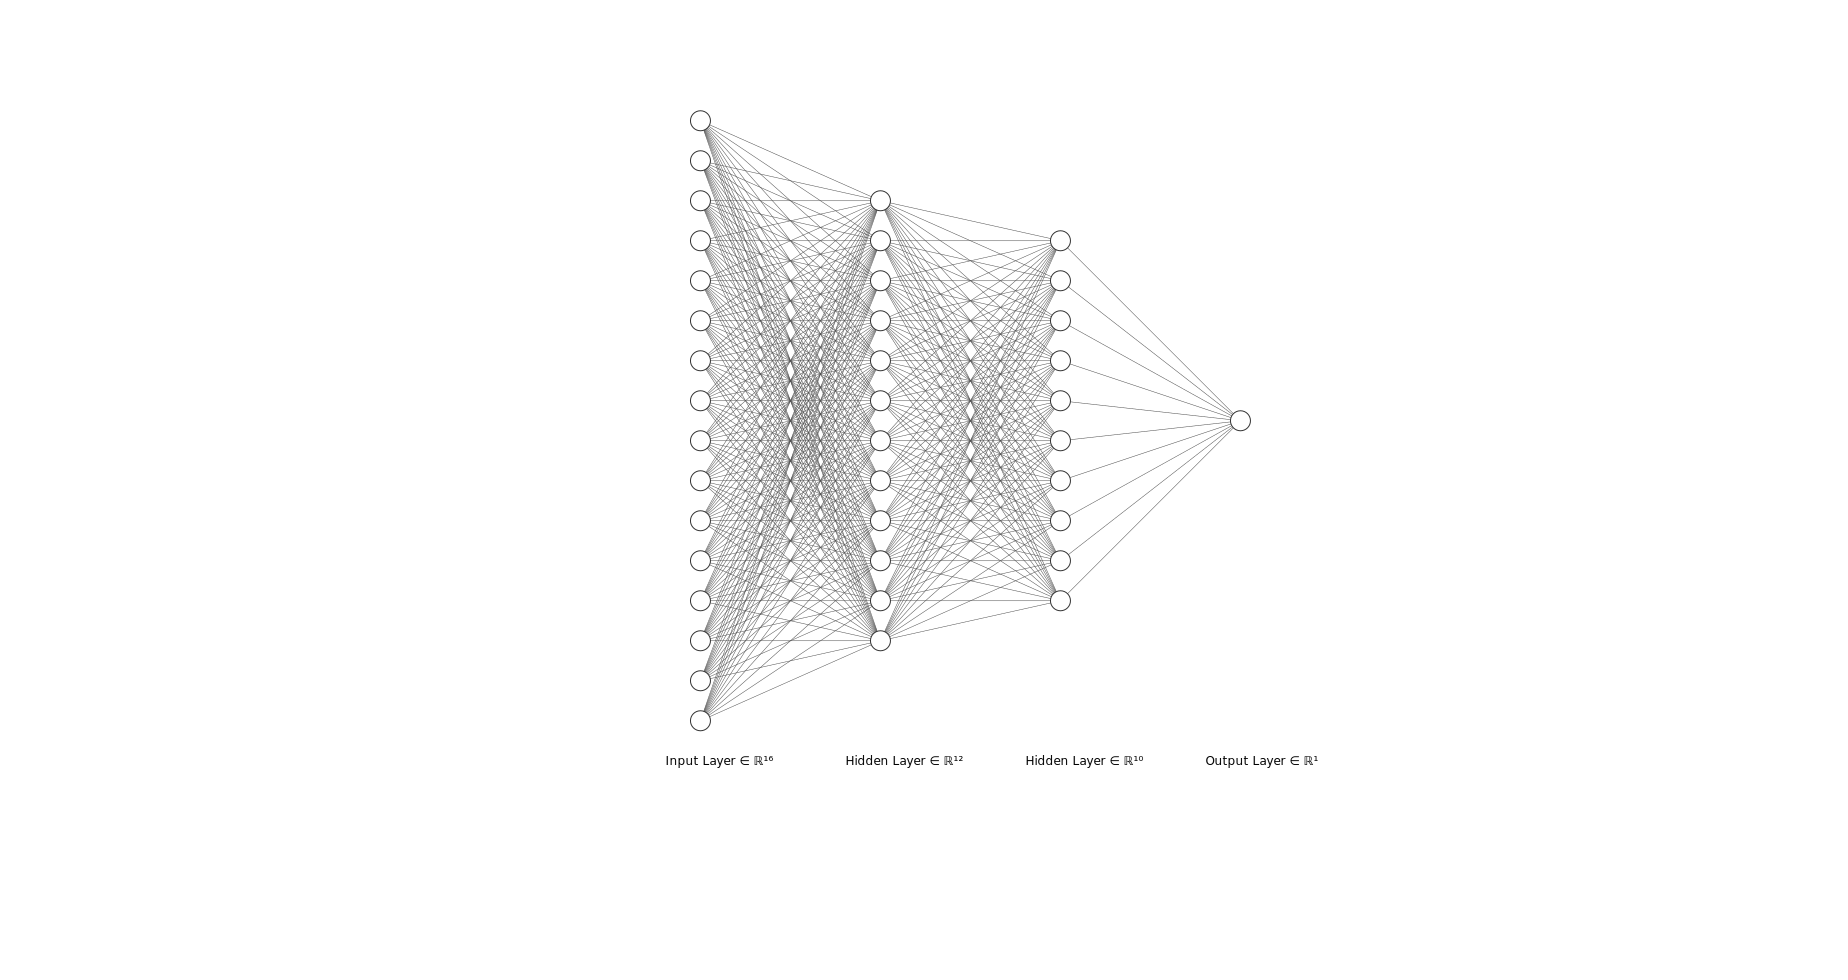

In [3]:
from IPython.core.display import SVG
SVG(filename='tuto_imgs/nn.svg')

# Layout

- Create a complex-valued neural network using cvnn toolbox
- Apply the cvnn on PolSAR data (using `dataset_reader`)
- (Optional) Testing
- (Optional) Documentation

# Installing CVNN

- Using [PIP](https://pypi.org/project/cvnn/): `pip install cvnn`
- Using [Anaconda](https://anaconda.org/negu93/cvnn) `conda install -c negu93 cvnn`

# Training CVNN

In [4]:
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images.astype(dtype=np.complex64) / 255.0, test_images.astype(dtype=np.complex64) / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [5]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
train_labels.shape

(50000, 10)

## Sequential API

In [36]:
from tensorflow.keras import models
import tensorflow.keras.layers as layers

def get_tf_sequential_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(32, 32, 3)))   # Always use ComplexInput at the start
    model.add(layers.Conv2D(32, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation="relu"))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(10, activation='softmax'))
    return model

get_tf_sequential_model().summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [43]:
import cvnn.layers as complex_layers

def get_cvnn_sequential_model():
    model = models.Sequential()
    model.add(complex_layers.ComplexInput(input_shape=(32, 32, 3)))   # Always use ComplexInput at the start
    model.add(complex_layers.ComplexConv2D(32, (3, 3), activation="cart_relu"))
    model.add(complex_layers.ComplexMaxPooling2D((2, 2)))
    model.add(complex_layers.ComplexConv2D(64, (3, 3), activation="cart_relu"))
    model.add(complex_layers.ComplexMaxPooling2D((2, 2)))
    model.add(complex_layers.ComplexConv2D(64, (3, 3), activation="cart_relu"))
    model.add(complex_layers.ComplexFlatten())
    model.add(complex_layers.ComplexDense(64, activation="cart_relu"))
    model.add(complex_layers.ComplexDense(10, activation='softmax_real_with_abs'))
    return model

get_cvnn_sequential_model().summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
complex_conv2d_6 (ComplexCon (None, 30, 30, 32)        1792      
_________________________________________________________________
complex_max_pooling2d_4 (Com (None, 15, 15, 32)        0         
_________________________________________________________________
complex_conv2d_7 (ComplexCon (None, 13, 13, 64)        36992     
_________________________________________________________________
complex_max_pooling2d_5 (Com (None, 6, 6, 64)          0         
_________________________________________________________________
complex_conv2d_8 (ComplexCon (None, 4, 4, 64)          73856     
_________________________________________________________________
complex_flatten_2 (ComplexFl (None, 1024)              0         
_________________________________________________________________
complex_dense_4 (ComplexDens (None, 64)               

## Functional API

In [39]:
from tensorflow.keras import Model

def get_tf_functional_model():
    inputs = layers.Input(shape=(32, 32, 3))
    conv1 = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    pool1 = layers.MaxPooling2D((2, 2))(conv1)
    conv2 = layers.Conv2D(64, (3, 3), activation="relu")(pool1)
    pool2 = layers.MaxPooling2D((2, 2))(conv2)
    conv3 = layers.Conv2D(64, (3, 3), activation="relu")(pool2)
    flat = layers.Flatten()(conv3)
    dense = layers.Dense(64, activation="relu")(flat)
    out = layers.Dense(10, activation='softmax')(dense)
    return Model(inputs, out)

get_tf_functional_model().summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0     

In [44]:
def get_cvnn_functional_model():
    inputs = complex_layers.complex_input(shape=(32, 32, 3))
    conv1 = complex_layers.ComplexConv2D(32, (3, 3), activation='cart_relu')(inputs)
    pool1 = complex_layers.ComplexMaxPooling2D((2, 2))(conv1)
    conv2 = complex_layers.ComplexConv2D(64, (3, 3), activation="cart_relu")(pool1)
    pool2 = complex_layers.ComplexMaxPooling2D((2, 2))(conv2)
    conv3 = complex_layers.ComplexConv2D(64, (3, 3), activation="cart_relu")(pool2)
    flat = complex_layers.ComplexFlatten()(conv3)
    dense = complex_layers.ComplexDense(64, activation="cart_relu")(flat)
    out = complex_layers.ComplexDense(10, activation='softmax_real_with_abs')(dense)
    return Model(inputs, out)

get_tf_functional_model().summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0   

In [45]:
from tensorflow import losses, metrics

model = get_cvnn_sequential_model()
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics='accuracy')
    
history = model.fit(train_images, train_labels, epochs=1, validation_data=(test_images, test_labels),batch_size=32)

Epoch 1/10


2022-04-19 14:05:59.698423: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8400


   1/1563 [..............................] - ETA: 39:39 - loss: 2.3046 - accuracy: 0.0938

2022-04-19 14:06:00.077546: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-04-19 14:06:00.077808: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-04-19 14:06:00.077820: W tensorflow/stream_executor/gpu/asm_compiler.cc:77] Couldn't get ptxas version string: Internal: Couldn't invoke ptxas --version
2022-04-19 14:06:00.078091: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-04-19 14:06:00.078133: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1563/1563 [==============================] - 28s 17ms/step - loss: 2.0349 - accuracy: 0.2558 - val_loss: 1.8114 - val_accuracy: 0.3512
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.6815 - accuracy: 0.3948 - val_loss: 1.5420 - val_accuracy: 0.4415
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4734 - accuracy: 0.4711 - val_loss: 1.4281 - val_accuracy: 0.4872
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.3489 - accuracy: 0.5194 - val_loss: 1.3072 - val_accuracy: 0.5332
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2557 - accuracy: 0.5565 - val_loss: 1.2635 - val_accuracy: 0.5488
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.1754 - accuracy: 0.5879 - val_loss: 1.2025 - val_accuracy: 0.5665
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1071 - accuracy: 0.6130 - val_loss: 1.1168 - val_accura

# Dataset Reader (PolSAR)

To use this mudule you must inherit implement two methods:

- `get_image`: Must open the image. It must be:
    - numpy array
    - Data type `np.complex`
    - Shape (Width, Height, channels), with `channels = 3` if `self.mode = 'k'` or `'s'` and `channels = 6` if `self.mode = 't'`.
        S format: (s_11, s_12, s_22) or equivalently (HH, HV, VV)
        T format:
        
    - *:return:* `np.ndarray` The opened numpy image.

- `get_sparse_labels`: Must open the labels in sparse mode (last dimension is a number from 0 to `num_classes`).
    - **ATTENTION**: Class 0 is considered as an unlabeled pixel.
    - *:return:* Numpy array with the sparse labels

**ATTENTION**: An internal variable `self.azimuth` is advised to be defined in the constructor to tell the class the azimuth direction.

In [2]:
from dataset_reader import PolsarDatasetHandler

root_path = "/media/barrachina/data/datasets/PolSar/San Francisco/PolSF/SF-AIRSAR/"

class MyDatasetReader(PolsarDatasetHandler):
    def __init__(self, *args, **kwargs):
        super(MyDatasetReader, self).__init__(root_path=os.path.dirname(root_path),
                                              name="AIRSAR", *args, **kwargs)
        self.azimuth = "vertical"

    def get_image(self):
        if self.mode == "s":
            data = self.open_s_dataset(str(Path(root_path) / "SAN_FRANCISCO_AIRSAR" / "S2"))
        elif self.mode == "t":
            data = self.open_t_dataset_t3(str(Path(root_path) / "SAN_FRANCISCO_AIRSAR" / "T3"))
        elif self.mode == "k":
            mat = self.open_s_dataset(str(Path(root_path) / "SAN_FRANCISCO_AIRSAR" / "S2"))
            data = self._get_k_vector(HH=mat[:, :, 0], VV=mat[:, :, 2], HV=mat[:, :, 1])
        else:
            raise ValueError(f"Mode {self.mode} not supported.")
        return data[0:900, 0:1024]

    def get_sparse_labels(self):
        return imread(str(Path(root_path) / "SF-AIRSAR-label2d.png"))

In [3]:
dataset_handler = MyDatasetReader(mode='t')

## Attributes

In [4]:
image = dataset_handler.image
print(f"Image shape {image.shape}")
print(f"Image dype {image.dtype}")

Image shape (900, 1024, 6)
Image dype complex64


In [5]:
# One Hot Encoded labels
labels = dataset_handler.labels
print(f"Labels shape {labels.shape}")
print(labels[0][0])        # Class 2
print(labels[800][510])    # No label

Labels shape (900, 1024, 5)
[0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0.]


In [6]:
sparse_labels = dataset_handler.sparse_labels
print(f"Sparse labels shape {sparse_labels.shape}")
print(f"Sparse labels min {np.min(sparse_labels)}")
print(f"Sparse labels max {np.max(sparse_labels)}")
print("**Note:** Value 0 is used for unlabeled data and 1-5 for the classes.")
print(sparse_labels[0][0])        # Class 2
print(sparse_labels[800][510])    # No label

Sparse labels shape (900, 1024)
Sparse labels min 0
Sparse labels max 5
**Note:** Value 0 is used for unlabeled data and 1-5 for the classes.
2
0


In [7]:
print(dataset_handler.labels_occurrences)

[ 1.          4.57857091 24.05415663 25.01970659  3.90548135]


2022-04-19 13:21:32.347703: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 13:21:32.353892: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 13:21:32.354354: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 13:21:32.355121: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [8]:
print(dataset_handler.get_occurrences(normalized=False))

[13701, 62731, 329566, 342795, 53509]


In [9]:
print(dataset_handler.get_occurrences(normalized=True))

[ 1.          4.57857091 24.05415663 25.01970659  3.90548135]


## Methods

### Plotters

/home/barrachina/Documents/onera/PolSar/dataset_reader.py:669: ComplexWarning: Casting complex values to real discards the imaginary part
  diagonal = coh_matrix[:, :, :3].astype(np.float32)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


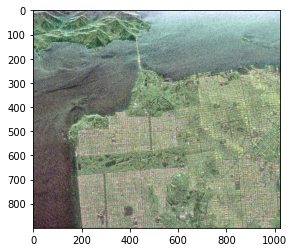

In [10]:
img = dataset_handler.print_image_png(showfig=True)

Using Plotly dataset colors


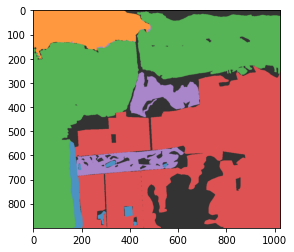

In [11]:
rgb_map = dataset_handler.print_ground_truth(showfig=True)

Using Plotly dataset colors


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


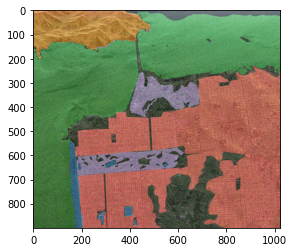

In [12]:
rgb_map = dataset_handler.print_ground_truth(showfig=True, transparent_image=.5)

### Getters

- `get_scattering_vector`
- `get_pauli_vector`
- `get_coherency_matrix`

In [13]:
s = dataset_handler.get_scattering_vector()

NotImplementedError: It is not possible to obtain the scattering vector from the coherency matrix

In [16]:
dataset_handler.mode = 's'

In [17]:
dataset_handler.get_scattering_vector().shape

(900, 1024, 3)

In [18]:
dataset_handler.get_coherency_matrix().shape

(900, 1024, 6)

In [22]:
complex_image = dataset_handler.image
print(complex_image.shape)
print(complex_image.dtype)

(900, 1024, 3)
complex64


In [21]:
real_image = dataset_handler.get_real_image()
print(real_image.shape)
print(real_image.dtype)

(900, 1024, 6)
float32


`get_real_image` has an optional parameter `mode` that accepts:
- 'real_image': real and imaginary part
- 'amplitude_phase': amplitude and phase
- 'amplitude_only': only the amplitude
- 'real_only': only the real part

In [23]:
real_image = dataset_handler.get_real_image('amplitude_only')
print(real_image.shape)
print(real_image.dtype)

(900, 1024, 3)
float32


### Get dataset

In [24]:
train_ds, val_ds, test_ds = dataset_handler.get_dataset(method="random", percentage=(0.08, 0.02, 0.9),
                                                        size=6, stride=6, pad=0)

Computing dataset seg_airsar_s_window(6, 6)_stride6_pad((0, 0), (0, 0))_patches.npy
Computation done in 0.07188360200962052 seconds


In [25]:
x_train, y_train = train_ds

In [26]:
x_train.shape

(1839, 6, 6, 3)

In [27]:
test_ds[0].shape

(20735, 6, 6, 3)

`method` parameter allows you to divide the image using the `azimuth` parameter.

<table><tr>
    <td><img src="tuto_imgs/train_ground_truth.png" width="350"/></td>
    <td><img src="tuto_imgs/val_ground_truth.png" width="75"/></td>
    <td><img src="tuto_imgs/test_ground_truth.png" width="75"/></td>
</tr></table>

In [77]:
train_ds, val_ds, test_ds = dataset_handler.get_dataset(method="random", percentage=(0.09, 0.01),
                                                        size=12, stride=1, pad='same', classification=True, 
                                                        complex_mode=True, real_mode="real_imag")

Computing dataset cls_airsar_s_window(12, 12)_stride1_pad((6, 5), (6, 5))_patches.npy
Computation done in 5.301745194999967 seconds


In [69]:
x_train, y_train = train_ds

# Training CVNN on PolSAR dataset

In [72]:
from tensorflow.keras.layers import Activation

in1 = complex_layers.complex_input(shape=(12, 12, 3))
c1 = complex_layers.ComplexConv2D(filters=6, kernel_size=3, strides=1, padding='valid', activation='linear')(in1)
conv = Activation('cart_relu')(c1)
p1 = complex_layers.ComplexAvgPooling2D(pool_size=2)(conv)
c2 = complex_layers.ComplexConv2D(filters=12, kernel_size=3, strides=1, padding='valid', activation='linear')(p1)
conv = Activation('cart_relu')(c2)
flat = complex_layers.ComplexFlatten()(conv)
out = complex_layers.ComplexDense(5, activation='softmax_real_with_abs')(flat)
model = Model(inputs=in1, outputs=out)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [73]:
history = model.fit(x_train, y_train, epochs=6, validation_data=val_ds, batch_size=100)

Epoch 1/6
723/723 [==============================] - 6s 8ms/step - loss: 0.3164 - accuracy: 0.9036 - val_loss: 0.1955 - val_accuracy: 0.9305
Epoch 2/6
723/723 [==============================] - 7s 10ms/step - loss: 0.1804 - accuracy: 0.9370 - val_loss: 0.1683 - val_accuracy: 0.9389
Epoch 3/6
723/723 [==============================] - 7s 10ms/step - loss: 0.1614 - accuracy: 0.9424 - val_loss: 0.1586 - val_accuracy: 0.9405
Epoch 4/6
723/723 [==============================] - 7s 10ms/step - loss: 0.1491 - accuracy: 0.9461 - val_loss: 0.1541 - val_accuracy: 0.9396
Epoch 5/6
723/723 [==============================] - 7s 9ms/step - loss: 0.1397 - accuracy: 0.9489 - val_loss: 0.1410 - val_accuracy: 0.9459
Epoch 6/6
723/723 [==============================] - 6s 9ms/step - loss: 0.1340 - accuracy: 0.9509 - val_loss: 0.1351 - val_accuracy: 0.9477


# Testing Module

## Assetions

When do we use `try..except..` or `if` conditions and when do we use `assert`? [source](https://realpython.com/python-assert-statement/) 

## Test Driven Development (TDD)

- Unit Test
- Integration Test
- End2end

Example scenario, create a function that sorts a list. What would you test?

[PyTest](https://github.com/NEGU93/cvnn)

# Documentation

- Markdown
    - Used in this jupyter notebook!
    - GitHub default `Readme.md` file
    - Easy to create and read (No compilation needed)
- ReStructuredText
    - Optimized for documenting code

CVNN [documentation](https://complex-valued-neural-networks.readthedocs.io/en/latest/index.html)

# Results online

[source]()